# Digital Image Formation and Enhancement

## Objectives
- Mathematically create synthetic images  
- Mathematically recreate a colored image  
- Manipulate the input–output (I–O) curve of a dark image  
- Perform histogram backprojection on a dark image  
- Enhance an image by contrast stretching  
- Apply different white-balancing algorithms to restore faded photographs  


## Synthetic Image: Circular Aperture

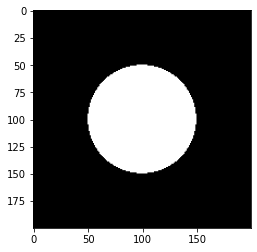

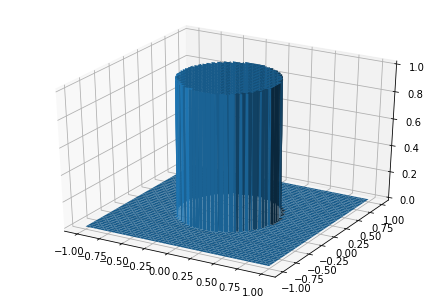

In [2]:
import numpy as np
import matplotlib.pyplot as plt
N = 200 #the higher num is the finer
x = np.linspace(-1,1,num = N)
y = x
X,Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
A = np.zeros(np.shape(R))
A[np.where(R<0.5)] = 1.0
plt.imshow(A, cmap="gray")
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,A)
plt.show()

## Synthetic Image: Grating

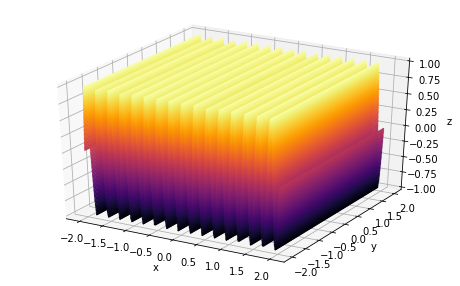

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, k):  #defines the sinusoidal function with amplitude of 1  
    return np.sin(2*k*np.pi*x) #k is the number of cycles per cm
N=200
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, N)
X, Y = np.meshgrid(x, y)        #generates the 2x2 xy-plane         
Z = f(X, 4)                  #Evaluates the function
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
ax.set_zlim(-1,1)
plt.savefig("sinusoid.png", bbox_inches = 'tight',
    pad_inches = 0.2)
plt.show()

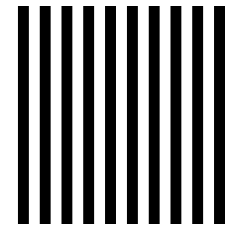

In [3]:
def f(x, k):  #defines the sinusoidal function with amplitude of 1  
    return np.sin(2*k*np.pi*x) #k is the number of cycles per cm
N=200
x = np.linspace(-1, 1, N)
y = x
X, Y = np.meshgrid(x, y)
Z = f(X, 5)
A = np.zeros(np.shape(Z))      
A[np.where(Z>0)] = 1.0 #faintly copies the projection of f(x) in the xy-plane
plt.imshow(A, cmap="gray", extent=[-2,2,-2,2])
plt.axis('off')
plt.imsave("strips.bmp",A.astype(np.uint8),cmap="gray")
plt.show()

## Synthetic Image: Square Aperture

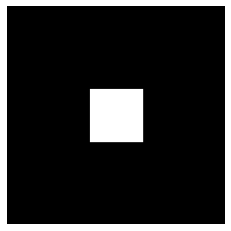

In [5]:
B=np.zeros(np.shape(Z))
for i in range(len(Z)):       #generates the 1x1 white square
  for j in range(len(Z)):
    if i>len(Z)/8*3 and i<len(Z)/8*5 and j>len(Z)/8*3 and j<len(Z)/8*5:
      B[i,j]=1.0
plt.imshow(B, cmap="gray", extent=[-1,1,-1,1])
plt.axis('off')
plt.savefig("square.png", bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

## Synthetic Image: Annular Aperture

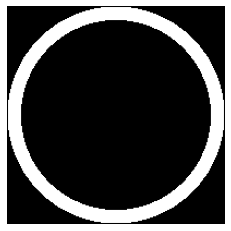

In [6]:
R = np.sqrt(X**2 + Y**2)   #parametric equation of a circle
A = np.zeros(np.shape(Z))
R_o=2                      #Radius of outer circle
R_i=1.75                    #Radius of inner circle
A[np.where(R<R_o)] = 1.0
A[np.where(R<R_i)] = 0.0
plt.imshow(A, cmap="gray", extent=[-1,1,-1,1])
plt.axis('off')
plt.savefig("annulus.png", bbox_inches = 'tight',
    pad_inches = 0)
plt.show()

## Synthetic Image: Gaussian Aperture

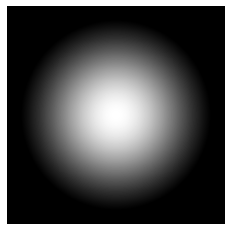

In [15]:
sigma=1                #standard deviation
def Gauss(X,Y):        #Gaussian equation
    return np.exp(-( (X) ** 2 + (Y) ** 2 ) / (2 * sigma ** 2)) 
circ = np.sqrt(X**2 + Y**2)
R_truncate=1.75     #Radius (in cm) of the distribution before truncation
Z=Gauss(X,Y)
#Setting the value of the outer square equal to the edge of the circle:
Z[np.where(circ>(R_truncate))] = Gauss(R_truncate,0)
plt.imshow(Z, cmap="gray", extent=[-1,1,-1,1])
plt.axis('off')
plt.imsave("Gaussian_2D.png",Z,cmap="gray")

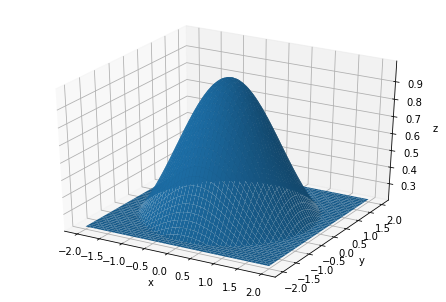

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
plt.savefig("Gaussian_3D.png", bbox_inches = 'tight')
plt.show()

## Mathematically recreating the Olympics logo

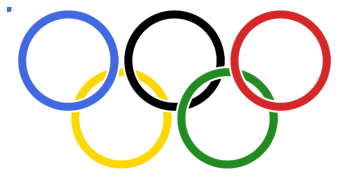

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import io
import cv2
from PIL import Image

theta = np.linspace(0, 2*np.pi, 100)
r = np.sqrt(1.0)
x1,x2 = r*np.cos(theta),r*np.sin(theta)

fig, ax = plt.subplots(1)
#yellow ring:
ax.plot(x1-.15, x2,linewidth=8.0,color="gold", \
    path_effects=[pe.Stroke(linewidth=12, foreground='white'), pe.Normal()])  
#black ring:
ax.plot(x1+1, x2+1.25,linewidth=8.0,color="k", \
    path_effects=[pe.Stroke(linewidth=12, foreground='white'), pe.Normal()])
#green ring:
ax.plot(x1+2.15, x2,linewidth=8.0,color="forestgreen", \
    path_effects=[pe.Stroke(linewidth=12, foreground='white'), pe.Normal()])
#red ring:
ax.plot(x1+3.3, x2+1.25,linewidth=8.0,color="tab:red",\
    path_effects=[pe.Stroke(linewidth=12, foreground='white'), pe.Normal()])
#blue ring:
ax.plot(x1-1.3, x2+1.25,linewidth=8.0,color="royalblue",\
    path_effects=[pe.Stroke(linewidth=12, foreground='white'), pe.Normal()])
ax.set_aspect(1)
ax.axis('off')

# convert the figure to an image array
def convert(fig, dpi=180):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi, bbox_inches = 'tight',
    pad_inches = 0)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img
rgbim = convert(fig)
plt.imshow(rgbim)

#save images in various formats
img = rgbim.astype(np.uint8)
plt.imsave("coloredcircle_jpg.jpg",img)
plt.imsave("coloredcircle_bmp.bmp",img)
plt.imsave("coloredcircle_png.png",img)
Image.fromarray(rgbim).save("coloredcircle_tif.tif")
plt.show()

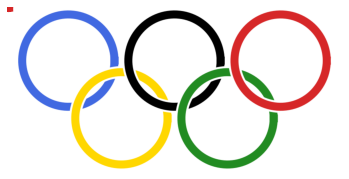

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import io
import cv2
from PIL import Image

theta = np.linspace(0, 2*np.pi, 100)
r = np.sqrt(1.0)
x1,x2 = r*np.cos(theta),r*np.sin(theta)

fig, ax = plt.subplots(1)
def ring(Dx1,Dx2,color): #function to plot a ring
    return ax.plot(x1+Dx1, x2+Dx2,linewidth=8.0,color=color, path_effects= \
            [pe.Stroke(linewidth=12, foreground='white'), pe.Normal()]) 
ring(-1.3,1.25,"royalblue") #blue ring
ring(-.15,0,"gold")         #yellow ring
ring(1,1.25,"k")            #black ring
ring(2.15,0,"forestgreen")  #green ring
ring(3.3,1.25,"tab:red")    #red ring
ax.set_aspect(1)
ax.axis('off')

# function to convert the figure to an image array
def convert(fig, dpi=180):
    buf = io.BytesIO()
    fig.savefig(buf, format="png", dpi=dpi, bbox_inches = 'tight',
    pad_inches = 0)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

rgbim = convert(fig)
plt.imshow(rgbim)

#save images in various formats
img = rgbim.astype(np.uint8)
plt.imsave("coloredcircle_jpg.jpg",img)
plt.imsave("coloredcircle_bmp.bmp",img)
plt.imsave("coloredcircle_png.png",img)
Image.fromarray(rgbim).save("coloredcircle_tif.tif")
plt.show()

## Manipulating an image’s I-O curve

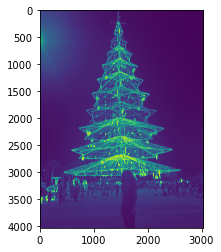

In [76]:
from PIL import Image
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt
try: 
    img  = imread("dark pic.JPG")
    img = rgb2gray(img)
except IOError:
    pass
plt.imshow(img)


In [77]:
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 1))

12192768


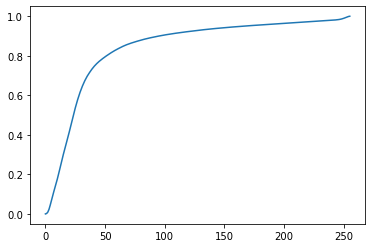

In [78]:
from sklearn.preprocessing import normalize
PDF=histogram/12192768
PDF=PDF[0:256]
CDF=np.cumsum(PDF)
plt.plot(CDF)
print(np.size(img))

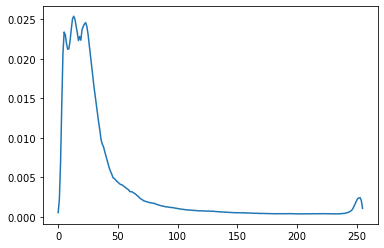

In [79]:
plt.plot(PDF)

In [80]:
print(np.size(PDF))

256


In [81]:
from PIL import Image

def get_num_pixels(filepath):
    width, height = Image.open(filepath).size
    return width*height

print(get_num_pixels("dark pic.JPG"))

12192768


In [82]:
x=np.linspace(0,255,256)
desiredCDF=(1/255)*x

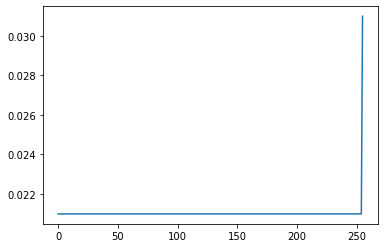

In [63]:
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 1))
PDF=histogram/12192768
PDF=PDF[0:256]
CDF=np.cumsum(PDF)
plt.plot(CDF)

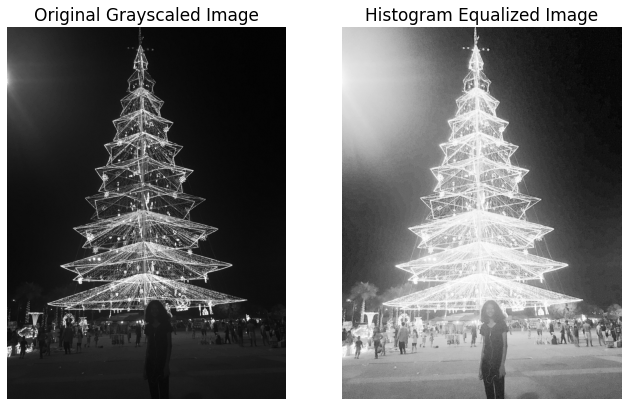

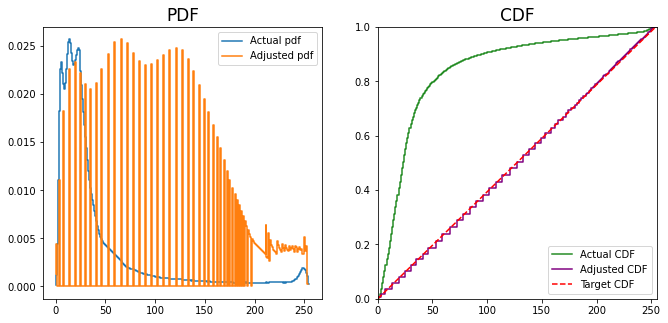

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from skimage.exposure import histogram, cumulative_distribution

Igray=img_as_ubyte(rgb2gray(imread("dark pic.jpg")))

def hist_equal(image): #carries out the equalization process
    pdf = histogram(image)[0]/np.sum(histogram(image)[0])
    cdf, bins = cumulative_distribution(image)    
    desired_bins = np.arange(255)
    desired_cdf = np.linspace(0, 1, len(desired_bins)) #target CDF
    newGS= np.interp(cdf, desired_cdf, desired_bins) #1D interpolation
    image_eq = img_as_ubyte(newGS[image].astype(np.uint8)) 
                                #convert image with values [0, 255]
    plt.imsave("equal_img.png",image_eq, cmap="gray") #save output
    cdf_adj, bins_adj = cumulative_distribution(image_eq) #calculate new cdf
    pdf_adj = histogram(image_eq)[0]/np.sum(histogram(image_eq)[0])
                                                #calculate new pdf
     #Plots: 
    fig, axes = plt.subplots(1, 2, figsize=(11,8));
    axes[0].imshow(image, cmap="gray");
    axes[1].imshow(image_eq, cmap="gray");
    axes[0].axis('off')
    axes[1].axis('off')
    axes[0].set_title('Original Grayscaled Image', fontsize = 17)
    axes[1].set_title('Histogram Equalized Image', fontsize = 17)
    fig, axes = plt.subplots(1, 2, figsize=(11,5));
    axes[0].step(bins,pdf, label="Actual pdf")
    axes[0].step(bins_adj,pdf_adj, label="Adjusted pdf")
    axes[1].step(bins, cdf, c='forestgreen', label='Actual CDF')
    axes[1].step(bins_adj, cdf_adj, c='purple', label='Adjusted CDF')
    axes[1].plot(desired_bins,desired_cdf, c='red', label='Target CDF',
                 linestyle = '--')
    axes[0].legend()
    axes[1].legend()
    axes[0].set_title('PDF', fontsize = 17)
    axes[1].set_title('CDF', fontsize = 17)
    plt.xlim(0, 255)
    plt.ylim(0, 1);
    return image_eq
  
Igraynew=hist_equal(Igray)

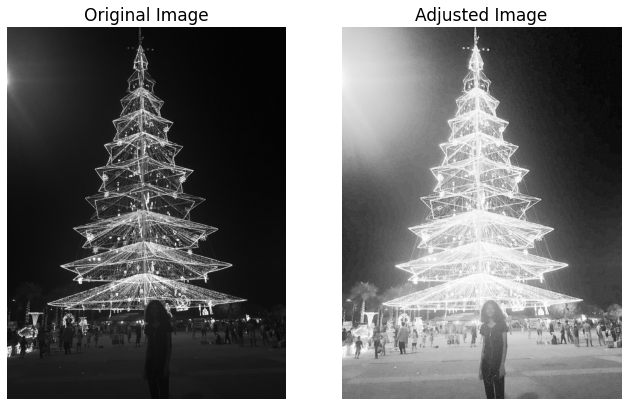

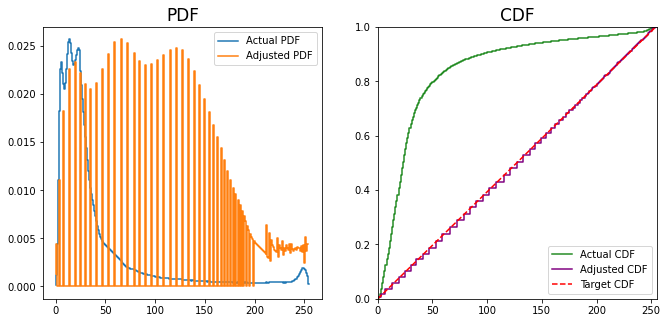

In [38]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.exposure import histogram
from skimage.io import imshow, imread
from skimage.color import rgb2gray

img_array = img_as_ubyte(rgb2gray(imread("dark pic.jpg")))
plt.imsave("gray.png",img_array, cmap="gray")

#Normalizing the histogram:
pdf,bins = histogram(img_array)[0]/np.sum(histogram(img_array)[0]),histogram(img_array)[1]
cdf = np.cumsum(pdf)
def equalize(cdf):
    transform_map = np.floor(255 * cdf).astype(np.uint8) #mapping the pixels
    img_list = list(img_array.flatten()) # flattening image array into 1D list
    # transform pixel values to equalize:
    equal_img_list = [transform_map[p] for p in img_list]
    # reshape and write back into img_array:
    equal_img = np.reshape(np.asarray(equal_img_list), img_array.shape)
    return equal_img
equal_img=equalize(cdf)
#Normalizing the histogram
pdf_adj,bins_adj = histogram(equal_img)[0]/np.sum(histogram(equal_img)[0]),histogram(equal_img)[1]
cdf_adj = np.cumsum(pdf_adj)
#Plots
fig, axes = plt.subplots(1, 2, figsize=(11,8));
axes[0].imshow(img_array,cmap='gray');
axes[1].imshow(equal_img,cmap='gray');

axes[0].axis('off')
axes[1].axis('off')
axes[0].set_title('Original Image', fontsize = 17)
axes[1].set_title('Adjusted Image', fontsize = 17)

fig, axes = plt.subplots(1, 2, figsize=(11,5));
axes[0].step(bins, pdf, label="Actual PDF")
axes[0].step(bins_adj, pdf_adj, label="Adjusted PDF")
axes[1].step(bins, cdf, c='forestgreen', label='Actual CDF')
axes[1].step(bins_adj, cdf_adj, c='purple', label='Adjusted CDF')
axes[1].plot(np.linspace(0, 1, 255),ls="dashed",label="Target CDF",c='red')

axes[0].legend()
axes[1].legend()
axes[0].set_title('PDF', fontsize = 17)
axes[1].set_title('CDF', fontsize = 17)
axes[1].set_xlim(0, 255)
axes[1].set_ylim(0, 1);

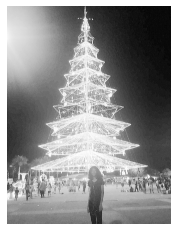

In [39]:
plt.imshow(equal_img, cmap="gray")
plt.axis('off')
plt.imsave("output.png",equal_img, cmap="gray")
plt.show()

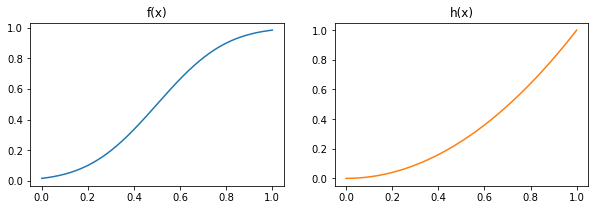

In [40]:
from math import erf, sqrt
def f(x):
    return sqrt(0.25)*erf(3*x-1.5)+(1/2)
def h(x):
    return (x)**(2)
x=np.linspace(0,1,256)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,3))
ax1.plot(x,list(map(f,x)))
ax1.set_title("f(x)")
ax2.plot(x,list(map(h,x)),c="tab:orange")
ax2.set_title("h(x)")
plt.show()

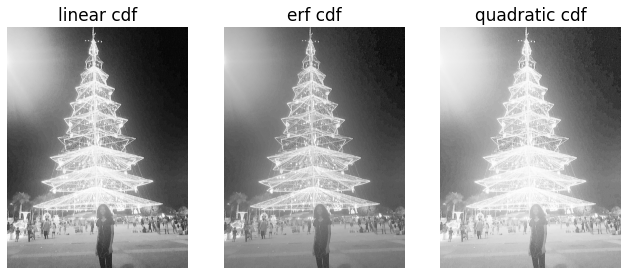

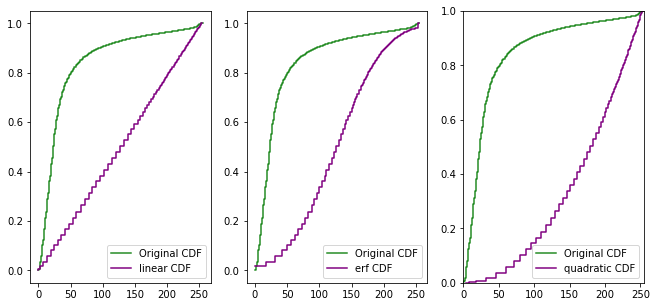

In [42]:
def f(x):
    return sqrt(0.25)*erf(3*x-1.5)+(1/2)
def h(x):
    return (x)**(2)
image_eq=equal_img
x=np.linspace(0,1,256)
image=img_array 
pdf = histogram(image)[0]/np.sum(histogram(image)[0])
cdf, bins = cumulative_distribution(image) 
desired_bins = np.arange(255)
x=np.linspace(0, 1, len(desired_bins))
desired_cdf1 = np.array(list(map(f,x))) #target CDF generated from f(x)
desired_cdf2 = np.array(list(map(h,x))) #target CDF generated from h(x)
newGS1= np.interp(cdf, desired_cdf1, desired_bins)
newGS2= np.interp(cdf, desired_cdf2, desired_bins)
image_eq1 = img_as_ubyte(newGS1[image].astype(np.uint8)) 
image_eq2 = img_as_ubyte(newGS2[image].astype(np.uint8))
cdf_adj1, bins_adj1 = cumulative_distribution(image_eq1)
cdf_adj2, bins_adj2 = cumulative_distribution(image_eq2)
 #Plots: 
fig, axes = plt.subplots(1, 3, figsize=(11,8));
axes[0].imshow(image_eq, cmap="gray");
axes[1].imshow(image_eq1, cmap="gray");
axes[2].imshow(image_eq2, cmap="gray");
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[0].set_title('linear cdf', fontsize = 17)
axes[1].set_title('erf cdf', fontsize = 17)
axes[2].set_title('quadratic cdf', fontsize = 17)
fig, axes = plt.subplots(1, 3, figsize=(11,5));
axes[0].step(bins, cdf, c='forestgreen', label='Original CDF')
axes[0].step(bins_adj, cdf_adj, c='purple', label='linear CDF')
axes[1].step(bins, cdf, c='forestgreen', label='Original CDF')
axes[1].step(bins_adj1, cdf_adj1, c='purple', label='erf CDF')
axes[2].step(bins, cdf, c='forestgreen', label='Original CDF')
axes[2].step(bins_adj2, cdf_adj2, c='purple', label='quadratic CDF')
axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.xlim(0, 255)
plt.ylim(0, 1);
plt.savefig("alter cdf.png",bbox_inches = 'tight',
    pad_inches = 0)

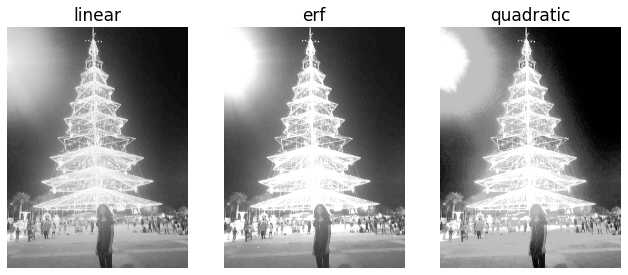

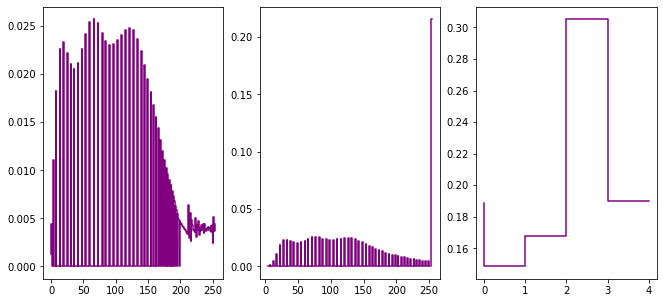

In [43]:
pdf = histogram(image)[0]/np.sum(histogram(image)[0])
pdf1=np.array(list(map(f,pdf))) #alter PDF by mapping it to f(x)
pdf2=np.array(list(map(h,pdf))) #alter PDF by mapping it to h(x)
bins=histogram(image)[1]
cdf1, cdf2= np.cumsum(pdf1),np.cumsum(pdf2)
desired_bins = np.arange(255)
desired_cdf = np.linspace(0, 1, len(desired_bins))
newGS1= np.interp(cdf1, desired_cdf, desired_bins)
newGS2= np.interp(cdf2, desired_cdf, desired_bins)
image_eq1 = img_as_ubyte(newGS1[image].astype(np.uint8)) 
image_eq2 = img_as_ubyte(newGS2[image].astype(np.uint8))
pdf_adj1,bins_adj1 = histogram(image_eq1)[0]/np.sum(histogram(image_eq1)[0])\
                                                    ,histogram(image_eq1)[1]
pdf_adj2,bins_adj2 = histogram(image_eq2)[0]/np.sum(histogram(image_eq2)[0])\
                                                    ,histogram(image_eq2)[1]
 #Plots: 
fig, axes = plt.subplots(1, 3, figsize=(11,8));
axes[0].imshow(image_eq, cmap="gray");
axes[1].imshow(image_eq1, cmap="gray");
axes[2].imshow(image_eq2, cmap="gray");
axes[0].axis('off')
axes[1].axis('off')
axes[2].axis('off')
axes[0].set_title('linear', fontsize = 17)
axes[1].set_title('erf', fontsize = 17)
axes[2].set_title('quadratic', fontsize = 17)
fig, axes = plt.subplots(1, 3, figsize=(11,5));
axes[0].step(bins_adj, pdf_adj, c='purple')
axes[1].step(bins_adj1, pdf_adj1, c='purple')
axes[2].step(bins_adj2, pdf_adj2, c='purple')
plt.savefig("alter pdf.png",bbox_inches = 'tight',
    pad_inches = 0)

## Enhancing a grayscale image by Contrast Stretching.

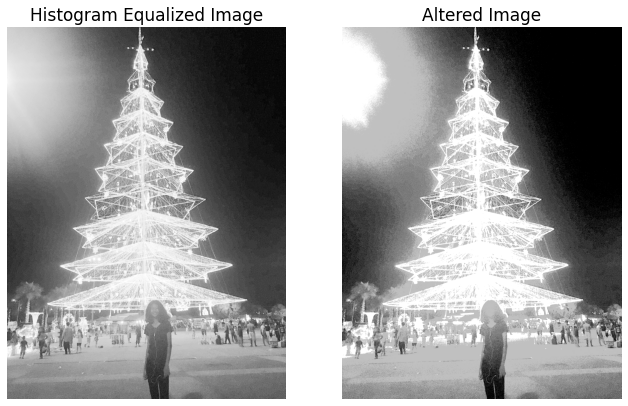

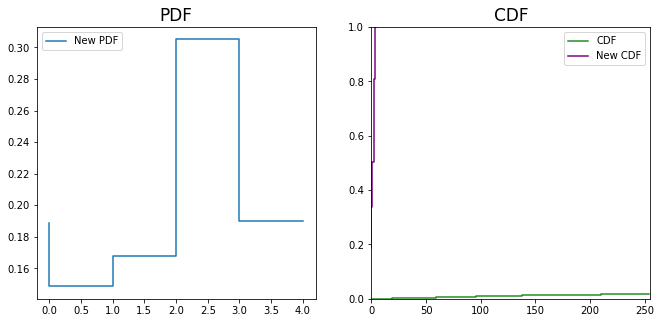

In [26]:
def h(x):     #function that will trnsform the PDF
    return (x)**(2)
image=Igraynew #load the equalized image
pdf = histogram(image)[0]/np.sum(histogram(image)[0])
bins=histogram(image)[1]
pdf=np.array(list(map(h,pdf))) #alter PDF by mapping it to h(x)
cdf = np.cumsum(pdf)
desired_bins = np.arange(255)
desired_cdf = np.linspace(0, 1, len(desired_bins)) 
newGS= np.interp(cdf, desired_cdf, desired_bins) 
image_eq = img_as_ubyte(newGS[image].astype(np.uint8)) 
cdf_adj, bins_adj = cumulative_distribution(image_eq) 
pdf_adj = histogram(image_eq)[0]/np.sum(histogram(image_eq)[0])
plt.imsave("output_alteredPDF.png",image_eq, cmap="gray")                                          
 #Plots: 
fig, axes = plt.subplots(1, 2, figsize=(11,8));
axes[0].imshow(image, cmap="gray");
axes[1].imshow(image_eq, cmap="gray");
axes[0].axis('off')
axes[1].axis('off')
axes[0].set_title('Histogram Equalized Image', fontsize = 17)
axes[1].set_title('Altered Image', fontsize = 17)
fig, axes = plt.subplots(1, 2, figsize=(11,5));
#axes[0].step(bins,pdf, label="Altered PDF")
axes[0].step(bins_adj,pdf_adj, label="New PDF")
axes[1].step(bins, cdf, c='forestgreen', label='CDF')
axes[1].step(bins_adj, cdf_adj, c='purple', label='New CDF')

axes[0].legend()
axes[1].legend()
axes[0].set_title('PDF', fontsize = 17)
axes[1].set_title('CDF', fontsize = 17)
plt.xlim(0, 255)
plt.ylim(0, 1);

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

img1 = imread("dark pic.jpg",as_gray=True) #load image
 
def contrast_stretch(image,minimum,maximum): #contrast stretch function
    img = np.ones(np.shape(image),dtype = 'uint8')
    mini = minimum
    maxi = maximum
    for i in range(np.shape(image)[0]):
        for j in range(np.shape(image)[1]): 
                if image[i,j]<=mini: #removing negative values
                    img[i,j] = image[i,j]
                elif image[i,j]>mini:
                    img[i,j] = 255*(((image[i,j])-mini)/(maxi-mini))
                                                            #normalizing
    return img


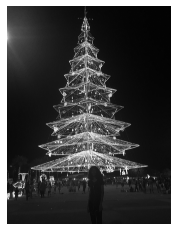

In [136]:
plt.figure(figsize=(5,10))
I=contrast_stretch(img1,np.min(img1),np.max(img1)) #max and min of the image
plt.imsave("Contrast_stretched max.png",I, cmap="gray")
fig, axes = plt.subplots(1, 2, figsize=(11,8));
axes[0].imshow(img1,cmap="gray")
axes[1].imshow(I,cmap="gray")
plt.axis('off')

(-0.5, 3023.5, 4031.5, -0.5)

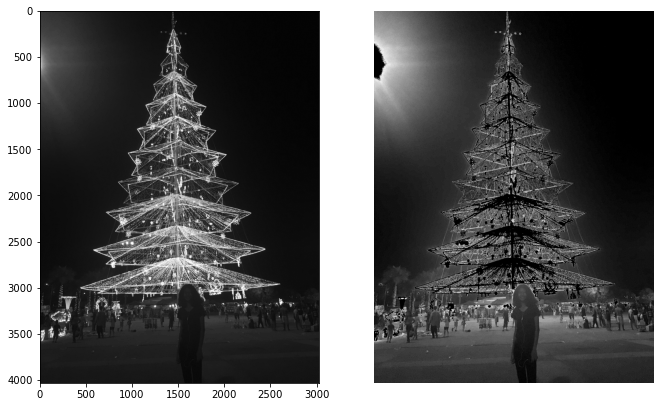

In [133]:
I=contrast_stretch(img1,np.percentile(img1,10),np.percentile(img1,90))
plt.imsave("Contrast_stretched 10,90.png",I, cmap="gray")
fig, axes = plt.subplots(1, 2, figsize=(11,8));
axes[0].imshow(img1,cmap="gray")
axes[1].imshow(I,cmap="gray")
plt.axis('off')

(-0.5, 3023.5, 4031.5, -0.5)

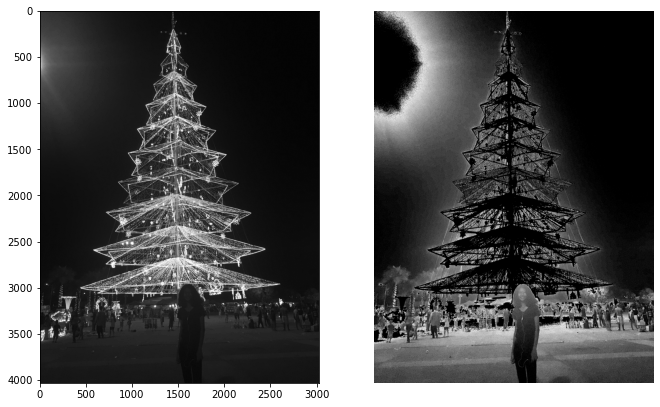

In [134]:
I=contrast_stretch(img1,np.percentile(img1,20),np.percentile(img1,80))
plt.imsave("Contrast_stretched 20,80.png",I, cmap="gray")
fig, axes = plt.subplots(1, 2, figsize=(11,8));
axes[0].imshow(img1,cmap="gray")
axes[1].imshow(I,cmap="gray")
plt.axis('off')

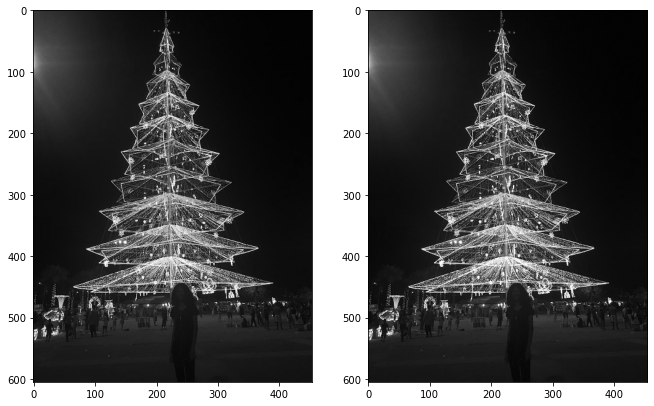

In [165]:
r=img_as_ubyte(rgb2gray(imread("dark pic 2.jpg")))
m,n=np.shape(r)

r1=11
r2=240
s1=10
s2=250

s=np.zeros(np.shape(r))

a=s1/r1
b=(s2-s1)/(r2-r1)
c=(255-s2)/(255-r2)

for i in range(np.shape(r)[0]):
    for j in range(np.shape(r)[1]):
        if r[i,j]<r1:
            s[i,j]=a*r[i,j]
        elif r[i,j]< r2:
            s[i,j]=b*(r[i,j]-r1)+s1
        else:
            s[i,j]=c*(r[i,j]-r2)+s2
fig, axes = plt.subplots(1, 2, figsize=(11,8));
axes[0].imshow(r,cmap="gray")
axes[1].imshow(s,cmap="gray")


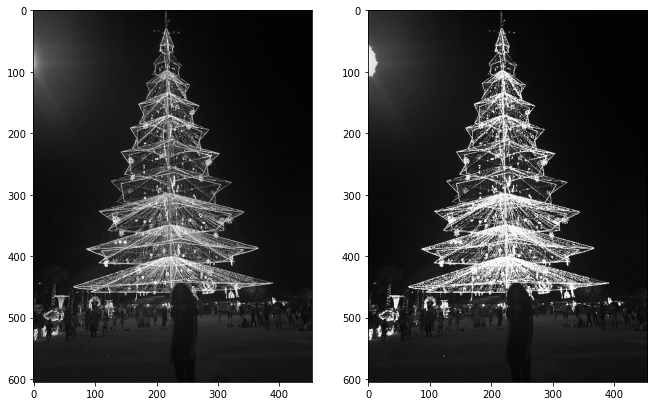

In [173]:
import numpy
import matplotlib.pyplot as plt
from copy import deepcopy

img = img_as_ubyte(rgb2gray(imread("dark pic 2.jpg")))

# copy list not reference
ct = deepcopy(img)

r1 = 100
s1 = 90
r2 = 80
s2 = 220

for i in range(len(img)):
    for j in range(len(img[i])):
        x = img[i][j]
        if(0 <= x and x <= r1):
            ct[i][j] = s1/r1 * x
        elif(r1 < x and x <= r2):
            ct[i][j] = ((s2 - s1)/(r2 - r1)) * (x - r1) + s1
        elif(r2 < x and x <= 255):
            ct[i][j] = ((255 - s2)/(255 - r2)) * (x - r2) + s2

fig, axes = plt.subplots(1, 2, figsize=(11,8));
axes[0].imshow(img,cmap="gray")
axes[1].imshow(ct,cmap="gray")
plt.show()

## Restoring Faded Colored Photographs

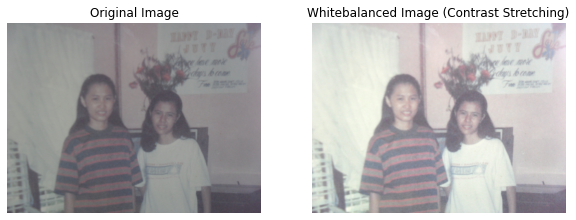

In [7]:
import skimage.io as io
from copy import deepcopy

img_filename = 'old.JPG'
I = io.imread(img_filename)
R,G,B=deepcopy(I),deepcopy(I),deepcopy(I)
#Extracting each color channel:
R[:,:,1],R[:,:,2]=0,0 
G[:,:,0],G[:,:,2]=0,0
B[:,:,0],B[:,:,1]=0,0

def stretch(image): #contrast stretch user-defined function
    image_cs = np.zeros((image.shape[0],image.shape[1],image.shape[2]), \
                        dtype = 'uint8')
    min = np.min(image)
    max = np.max(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(3):
                image_cs[i,j,k] = 255*(image[i,j,k]-min)/(max-min)#normalizing
    return image_cs

R,G,B=stretch(R),stretch(G),stretch(B)
I_restored=R+G+B #overlay the channels
plt.imsave("Restored_cs.png",I_restored)#save restored image
#plot:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(I)
ax[0].set_title('Original Image')
ax[1].imshow(I_restored)
ax[1].set_title('Whitebalanced Image (Contrast Stretching)');
ax[0].axis('off')
ax[1].axis('off')
plt.show()

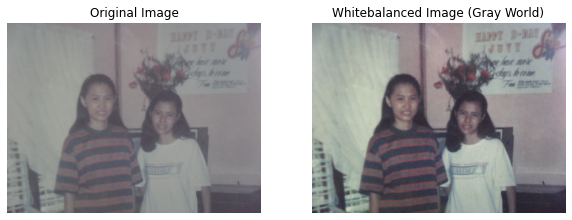

In [59]:
R,G,B=deepcopy(I),deepcopy(I),deepcopy(I)
#Extracting each color channel:
R[:,:,1],R[:,:,2]=0,0
G[:,:,0],G[:,:,2]=0,0
B[:,:,0],B[:,:,1]=0,0

def gray(image,n): #gray world user-defined function
    image_gw = ((image*(image / image[...,n].mean()))
             .clip(0, 255).astype(int))
    return image_gw

R, G, B=gray(R,0),gray(G,1),gray(B,2)
I_restored=R+G+B
plt.imsave("Restored_gw.png",I_restored.astype(np.uint8))#save restored image
#plot:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(I)
ax[0].set_title('Original Image')
ax[1].imshow(I_restored)
ax[1].set_title('Whitebalanced Image (Gray World)');
ax[0].axis('off')
ax[1].axis('off')
plt.show()

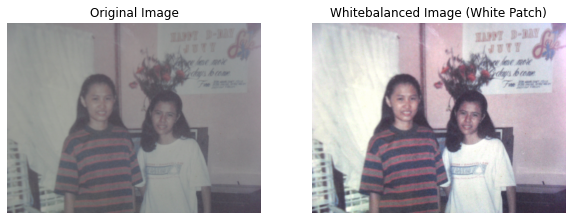

In [54]:
R,G,B=deepcopy(I),deepcopy(I),deepcopy(I)
#Extracting each color channel of the image:
R[:,:,1],R[:,:,2]=0,0
G[:,:,0],G[:,:,2]=0,0
B[:,:,0],B[:,:,1]=0,0

w=io.imread("white.jpg") #load the white patch

Rw,Gw,Bw=deepcopy(w),deepcopy(w),deepcopy(w)
#Extracting each color channel of the white patch:
Rw[:,:,1],Rw[:,:,2]=0,0
Gw[:,:,0],Gw[:,:,2]=0,0
Bw[:,:,0],Bw[:,:,1]=0,0

def white(image,w,n): #white patch user-defined function
    wp=((image*(image / w[...,n].mean())).clip(0, 255).astype(int))
    return wp

R, G, B=white(R,Rw,0), white(G,Gw,1), white(B,Bw,2)
I_restored=R+G+B
plt.imsave("Restored_wp.png",I_restored.astype(np.uint8))#save restored image
#plot:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(I)
ax[0].set_title('Original Image')
ax[1].imshow(I_restored)
ax[1].set_title('Whitebalanced Image (White Patch)');
ax[0].axis('off')
ax[1].axis('off')
plt.show()

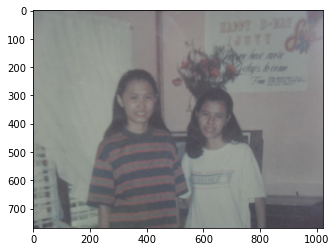

In [35]:
import numpy as np
import skimage.io as io

img_filename = 'old.JPG'
I = io.imread(img_filename)

def grey_world(nimg):
    nimg = nimg.transpose(2, 0, 1).astype(np.uint32)
    mu_g = np.average(nimg[1])
    nimg[0] = np.minimum(nimg[0]*(mu_g/np.average(nimg[0])),255)
    nimg[2] = np.minimum(nimg[2]*(mu_g/np.average(nimg[2])),255)
    return  nimg.transpose(1, 2, 0).astype(np.uint8)

I_restored=grey_world(I)
plt.imshow(I_restored)

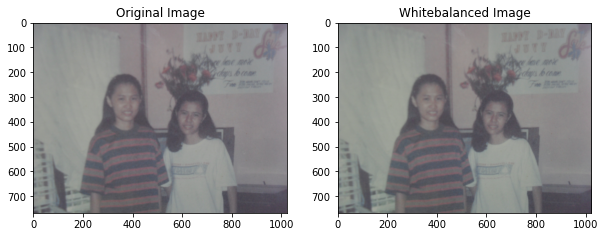

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow

img_filename = 'old.JPG'
image = io.imread(img_filename)

fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
image_gw = ((image * (image.mean() / image.mean(axis=(0, 1))))
             .clip(0, 255).astype(int))
ax[1].imshow(image_gw);
ax[1].set_title('Whitebalanced Image');

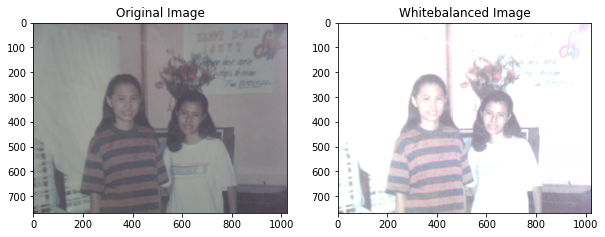

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
image_mean = (image*1.0 / image.mean(axis=(0,1)))
ax[1].imshow(image_mean.clip(0, 1))
ax[1].set_title('Whitebalanced Image');

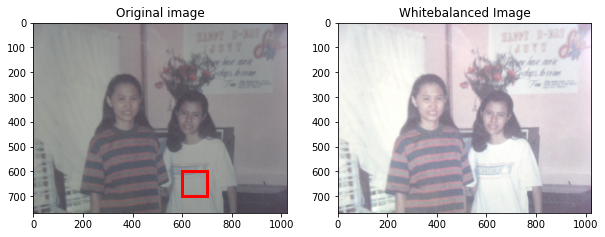

In [49]:
img_filename = 'old.JPG'
image = io.imread(img_filename)
from matplotlib.patches import Rectangle

def whitepatch_balancing(image, from_row, from_column,row_width,column_width):    
    fig, ax = plt.subplots(1,2, figsize=(10,5))
    ax[0].imshow(image)
    ax[0].add_patch(Rectangle((from_column, from_row), 
                              column_width, 
                              row_width, 
                              linewidth=3,
                              edgecolor='r', facecolor='none'));
    ax[0].set_title('Original image')    
    image_patch = image[from_row:from_row+row_width, 
                        from_column:from_column+column_width]    
    image_max = (image*1.0 / 
                 image_patch.max(axis=(0, 1))).clip(0, 1)
    ax[1].imshow(image_max);
    ax[1].set_title('Whitebalanced Image')
    
whitepatch_balancing(image, 600, 600, 100, 100)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFE6C4F850>,
      dtype=object)

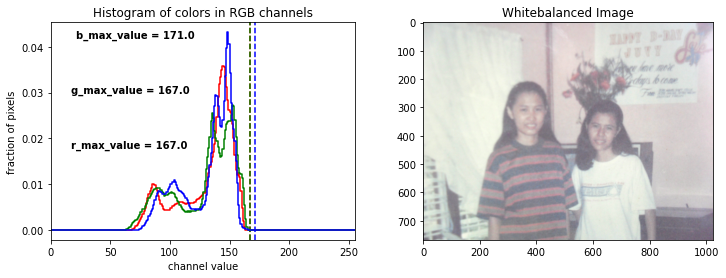

In [63]:
from skimage import img_as_ubyte
def percentile_whitebalance(image, percentile_value):
    fig, ax = plt.subplots(1,2, figsize=(12,4))
    for channel, color in enumerate('rgb'):
        channel_values = image[:,:,channel]
        value = np.percentile(channel_values, percentile_value)
        ax[0].step(np.arange(256), 
                   np.bincount(channel_values.flatten(), 
                   minlength=256)*1.0 / channel_values.size, 
                   c=color)
        ax[0].set_xlim(0, 255)
        ax[0].axvline(value, ls='--', c=color)
        ax[0].text(value-150, .018+.012*channel, 
                   "{}_max_value = {}".format(color, value), 
                    weight='bold', fontsize=10)
    ax[0].set_xlabel('channel value')
    ax[0].set_ylabel('fraction of pixels');
    ax[0].set_title('Histogram of colors in RGB channels')    
    whitebalanced = img_as_ubyte(
            (image*1.0 / np.percentile(image, 
             percentile_value, axis=(0, 1))).clip(0, 1))
    ax[1].imshow(whitebalanced);
    ax[1].set_title('Whitebalanced Image')
    return ax
percentile_whitebalance(image, 100)